## Ève Castonguay, ---- - Laboratoire 3, expérience 3
### Créé le 29/10/2025

# Partie I: Modèle à 0D d'équilibre radiatif

#### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import subplot, ylabel, xlabel
import seaborn as sns
import scipy
import math

plt.rcParams["text.usetex"] = True

#### Calcul des températures Ta et Ts

In [3]:
## 1) définir les valeurs des constantes
S0 = 1365 # constante solaire, W/m2
R = 6378e3 # rayon de la Terre, m
epsilon_s = 1 # émissivité du sol (Terre)
sigma = 5.67e-8 # constante de Boltzmann, W m-2 K-4
# à faire varier:
alpha = 0.3 # albedo
epsilon_a = 0.77 # émissivité de l'atmosphère

## 2) équation de température de surface de la Terre
T_s = ( ((1-alpha)*S0)/(4*sigma*(epsilon_s-epsilon_a/2)) ) ** 0.25
print("Température au sol: ", round(T_s,0),"K")

## 3) équation de température de l'atmosphère
T_a = ((epsilon_s*T_s**4)/2) ** 0.25
print("Température de l'atmosphère: ", round(T_a,0),"K")


Température au sol:  288.0 K
Température de l'atmosphère:  242.0 K


#### Graphiques

##### 1) Influence de la variation d'alpha (0-1) sur les températures

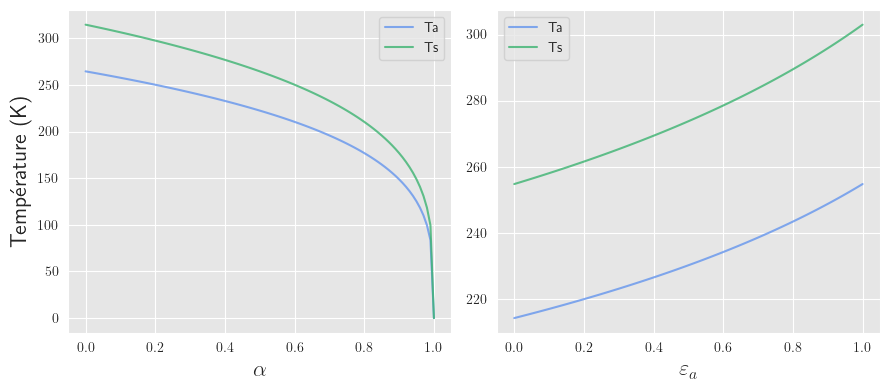

In [6]:
fig, ax = plt.subplots(1,2, figsize=(9,4))
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})

### Graphique gauche

## 1) définir les constantes
S0 = 1365 # constante solaire, W/m2
R = 6378e3 # rayon de la Terre, m
epsilon_s = 1 # émissivité du sol (Terre)
sigma = 5.67e-8 # constante de Boltzmann, W m-2 K-4
epsilon_a = 0.77 # émissivité de l'atmosphère

## 2) définir un vecteur d'alpha
pas_de_temps = 0.01
alpha = np.arange(0,1+pas_de_temps,pas_de_temps)

## 3) valeurs de T_s
T_s = []
for a in alpha:
    t = ( ((1-a)*S0)/(4*sigma*(epsilon_s-epsilon_a/2)) ) ** 0.25
    T_s.append(t)

## 4) valeurs de T_a
T_a = []
for i in T_s:
    t = ((epsilon_s*i**4)/2) ** 0.25
    T_a.append(t)

## 5) graphique
ax[0].plot(alpha,T_a,color='cornflowerblue',alpha=0.8,label='Ta')
ax[0].plot(alpha,T_s,color='mediumseagreen',alpha=0.8,label='Ts')

ax[0].legend()
ax[0].set_xlabel(r"$\alpha$",fontsize=16)
ax[0].set_ylabel("Température (K)",fontsize=16)

### Graphique droite

## 1) définir les constantes
S0 = 1365 # constante solaire, W/m2
R = 6378e3 # rayon de la Terre, m
epsilon_s = 1 # émissivité du sol (Terre)
sigma = 5.67e-8 # constante de Boltzmann, W m-2 K-4
alpha = 0.3 # albedo

## 2) définir un vecteur d'epsilon_a
pas_de_temps = 0.01
epsilon_a = np.arange(0,1+pas_de_temps,pas_de_temps)

## 3) valeurs de T_s
T_s = []
for e in epsilon_a:
    t = ( ((1-alpha)*S0)/(4*sigma*(epsilon_s-e/2)) ) ** 0.25
    T_s.append(t)

## 4) valeurs de T_a
T_a = []
for i in T_s:
    t = ((epsilon_s*i**4)/2) ** 0.25
    T_a.append(t)

## 5) graphique
ax[1].plot(epsilon_a,T_a,color='cornflowerblue',alpha=0.8,label='Ta')
ax[1].plot(epsilon_a,T_s,color='mediumseagreen',alpha=0.8,label='Ts')

ax[1].legend()
ax[1].set_xlabel(r"$\varepsilon_a$",fontsize=16)

plt.tight_layout()
plt.savefig('/Users/evecastonguay/Desktop/Labo/E_03/Figures/panel_1.png',dpi=500)
plt.show()


##### 2) Influence de la variation de l'émissivité (0-1) sur les températures (pas utilisé car incorporé dans 1)

-40.53469178376625
-48.20414387369715


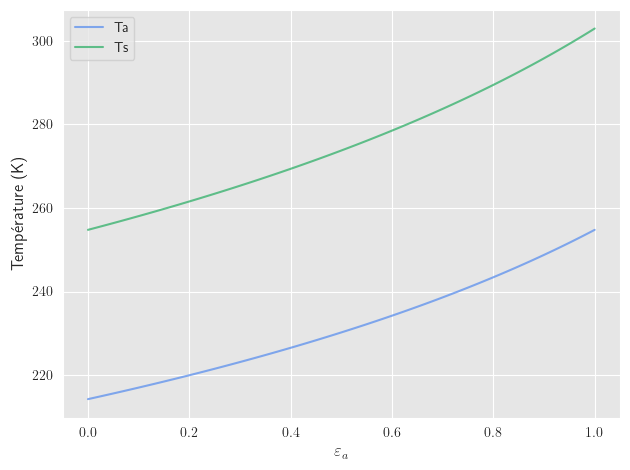

In [38]:
## 1) définir les constantes
S0 = 1365 # constante solaire, W/m2
R = 6378e3 # rayon de la Terre, m
epsilon_s = 1 # émissivité du sol (Terre)
sigma = 5.67e-8 # constante de Boltzmann, W m-2 K-4
alpha = 0.3 # albedo

## 2) définir un vecteur d'epsilon_a
pas_de_temps = 0.01
epsilon_a = np.arange(0,1+pas_de_temps,pas_de_temps)

## 3) valeurs de T_s
T_s = []
for e in epsilon_a:
    t = ( ((1-alpha)*S0)/(4*sigma*(epsilon_s-e/2)) ) ** 0.25
    T_s.append(t)

## 4) valeurs de T_a
T_a = []
for i in T_s:
    t = ((epsilon_s*i**4)/2) ** 0.25
    T_a.append(t)

## 5) graphique
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
fig, ax = plt.subplots()
ax.plot(epsilon_a,T_a,color='cornflowerblue',alpha=0.8,label='Ta')
ax.plot(epsilon_a,T_s,color='mediumseagreen',alpha=0.8,label='Ts')

ax.legend()
ax.set_xlabel(r"$\varepsilon_a$",fontsize=12)
ax.set_ylabel("Température (K)",fontsize=12)

plt.tight_layout()
plt.savefig('/Users/evecastonguay/Desktop/Labo/E_03/Figures/1_2.png',dpi=500)
plt.show()


##### 3) Sensibilité de la valeur d'alpha (pas utilisé)

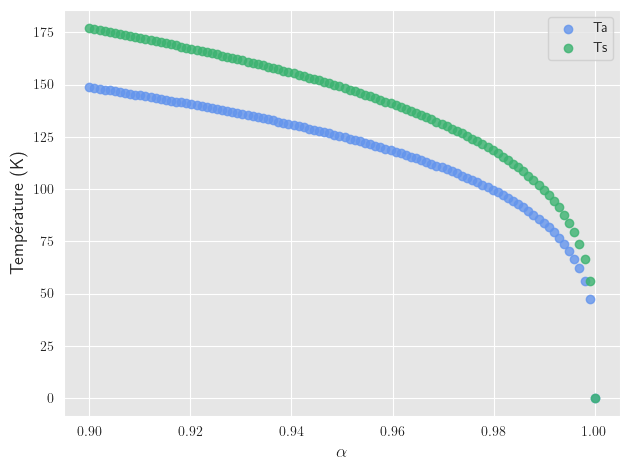

In [9]:
## 1) définir les constantes
S0 = 1365 # constante solaire, W/m2
R = 6378e3 # rayon de la Terre, m
epsilon_s = 1 # émissivité du sol (Terre)
sigma = 5.67e-8 # constante de Boltzmann, W m-2 K-4
epsilon_a = 0.77 # émissivité de l'atmosphère

## 2) définir un vecteur d'alpha
pas_de_temps = 0.001
#alpha = np.arange(0.9,1+pas_de_temps,pas_de_temps)
alpha = np.linspace(0.9,1,num=100)

"""erreur = [0,0.001,0.01,0.1]
for e in erreur:
    alpha.append(e+0.3)"""

## 3) valeurs de T_s
T_s = []
for a in alpha:
    t = ( ((1-a)*S0)/(4*sigma*(epsilon_s-epsilon_a/2)) ) ** 0.25
    T_s.append(t)

## 4) valeurs de T_a
T_a = []
for i in T_s:
    t = ((epsilon_s*i**4)/2) ** 0.25
    T_a.append(t)

## 5) graphique
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
fig, ax = plt.subplots()
ax.scatter(alpha,T_a,color='cornflowerblue',alpha=0.8,label='Ta')
ax.scatter(alpha,T_s,color='mediumseagreen',alpha=0.8,label='Ts')

ax.legend()
ax.set_xlabel(r"$\alpha$",fontsize=13)
ax.set_ylabel("Température (K)",fontsize=13)

plt.tight_layout()
plt.savefig('/Users/evecastonguay/Desktop/Labo/E_03/Figures/1_3.png',dpi=500)
plt.show()


##### 4) Variation des températures par rapport à alpha, pour des valeurs entre 0.9 et 1 (pas utilisé)

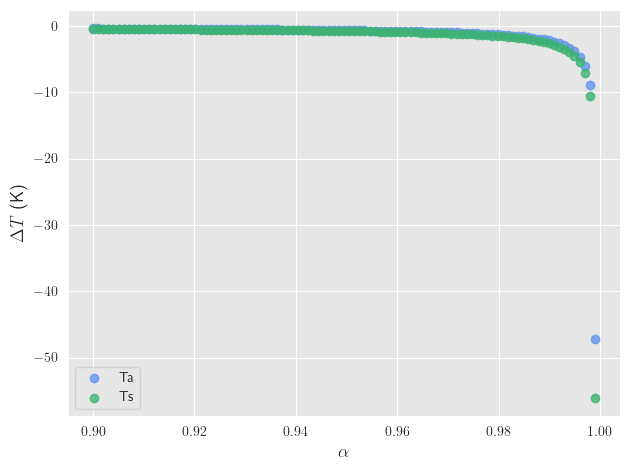

In [8]:
## 1) définir les constantes
S0 = 1365 # constante solaire, W/m2
R = 6378e3 # rayon de la Terre, m
epsilon_s = 1 # émissivité du sol (Terre)
sigma = 5.67e-8 # constante de Boltzmann, W m-2 K-4
epsilon_a = 0.77 # émissivité de l'atmosphère

## 2) définir un vecteur d'alpha
pas_de_temps = 0.001
#alpha = np.arange(0.9,1+pas_de_temps,pas_de_temps)
alpha = np.linspace(0.9,1,num=100)

"""erreur = [0,0.001,0.01,0.1]
for e in erreur:
    alpha.append(e+0.3)"""

## 3) valeurs de T_s
T_s = []
for a in alpha:
    t = ( ((1-a)*S0)/(4*sigma*(epsilon_s-epsilon_a/2)) ) ** 0.25
    T_s.append(t)

## 4) valeurs de T_a
T_a = []
for i in T_s:
    t = ((epsilon_s*i**4)/2) ** 0.25
    T_a.append(t)

## 5) graphique
sns.set_style("darkgrid", {"axes.facecolor": "0.9"})
fig, ax = plt.subplots()
ax.scatter(alpha[:-1],np.diff(T_a),color='cornflowerblue',alpha=0.8,label='Ta')
ax.scatter(alpha[:-1],np.diff(T_s),color='mediumseagreen',alpha=0.8,label='Ts')

ax.legend()
ax.set_xlabel(r"$\alpha$",fontsize=13)
ax.set_ylabel(r"$\Delta T$ (K)",fontsize=13)

plt.tight_layout()
plt.savefig('/Users/evecastonguay/Desktop/Labo/E_03/Figures/1_4.png',dpi=500)
plt.show()
